## Introduction


In [1]:
%matplotlib notebook
from pathlib import Path
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
from celluloid import Camera
from natsort import natsorted
from IPython.display import HTML

## Inspection:
We do not need to preprocess this dataset as the necessary steps are directly performed by torchio during training

In [2]:
root = Path("Liver/imagesTr/")
label = Path("Liver/labelsTr/")

We start with a helper function which automatically replaces "imagesTr" with "labelsTr" in the filepaths so that we can easily switch between CT images and label masks

In [3]:
def change_img_to_label_path(path):
    parts = list(path.parts)  # get all directories within the path
    parts[parts.index("imagesTr")] = "labelsTr"  # Replace imagesTr with labelsTr
    return Path(*parts)  # Combine list back into a Path object


In [4]:
sample_path = list(root.glob("liver*"))# Choose a subject
sorted_paths = natsorted(sample_path)
sample_path = sorted_paths[4]
sample_path_label = change_img_to_label_path(sample_path)

Load NIfTI and extract image data

In [5]:
for path in sorted_paths: 
    data = nib.load(path)
    label = nib.load(change_img_to_label_path(path))

    ct = data.get_fdata()
    mask = label.get_fdata().astype(int)  # Class labels should not be handled as float64

In [6]:
print(nib.aff2axcodes(data.affine))
print(ct.shape)

('R', 'A', 'S')
(181, 181, 79)


<IPython.core.display.Javascript object>


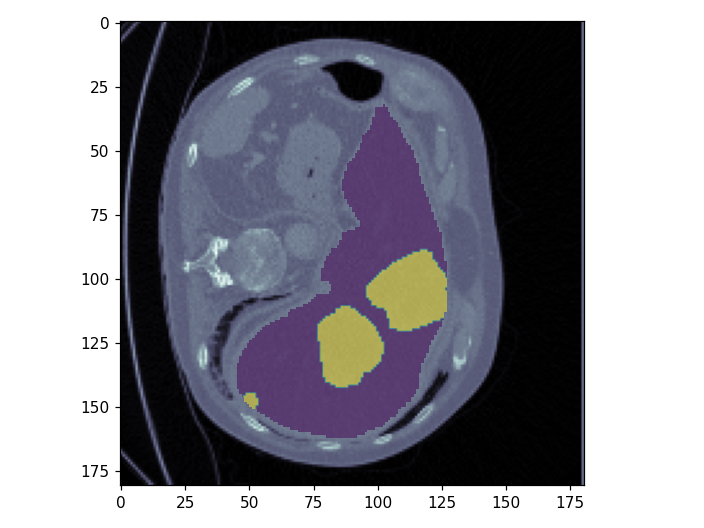

In [7]:
fig = plt.figure()
camera = Camera(fig)  # Create the camera object from celluloid

for i in range(ct.shape[2]):  # Axial view
    plt.imshow(ct[:,:,i], cmap="bone")
    mask_ = np.ma.masked_where(mask[:,:,i]==0, mask[:,:,i])
    plt.imshow(mask_, alpha=0.5)
    # plt.axis("off")
    camera.snap()  # Store the current slice
plt.tight_layout()
animation = camera.animate()  # Create the animation


